Word 2 vec Assisgnment:

- you have to take one dataset from kaggle from any where(web)
- train you custom word2vec model
- then suppers dimesion of vectors into 2 dimesion using PCA(dimesion reduction)
- then plot the data using graph(plot 2-d data)
- check the similarity between the words
- then send it to me inside th chat section keep your soltion over the github or drive and send the link in the community chat

In [1]:
import pandas as pd
import numpy as np
import nltk
import gensim

In [2]:
# Reading News category dataset

df = pd.read_json('C:/Users/Public/Documents/Adavnced_NLP/Codes/Datasets/News_Category_Dataset_v3.json', lines=True)

In [3]:
# Checking head of dataset

df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [4]:
# Taking descriptions as a corpus for word2vec model training 

corpus = df['short_description']

corpus.head()



0    Health experts said it is too early to predict...
1    He was subdued by passengers and crew when he ...
2    "Until you have a dog you don't understand wha...
3    "Accidentally put grown-up toothpaste on my to...
4    Amy Cooper accused investment firm Franklin Te...
Name: short_description, dtype: object

In [5]:
# Checking size of corpus

corpus.size

209527

In [6]:
# creating raw sentences

raw_sentence = []

for i in corpus:
    sentence = nltk.sent_tokenize(i)
    
    raw_sentence.append(i)

raw_sentence[:5]

['Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.',
 "He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.",
 '"Until you have a dog you don\'t understand what could be eaten."',
 '"Accidentally put grown-up toothpaste on my toddler’s toothbrush and he screamed like I was cleaning his teeth with a Carolina Reaper dipped in Tabasco sauce."',
 'Amy Cooper accused investment firm Franklin Templeton of unfairly firing her and branding her a racist after video of the Central Park encounter went viral.']

In [7]:
# Importing simple proceess from gensim.utils module to tokenize given text into a list of lowercase tokens, removing punctuation and 
# other non-alphanumeric characters.

from gensim.utils import simple_preprocess

In [8]:
# creating tokens from each document
final_corpus = []
for i in raw_sentence:
    final_corpus.append(simple_preprocess(i))

In [9]:
final_corpus[:5]

[['health',
  'experts',
  'said',
  'it',
  'is',
  'too',
  'early',
  'to',
  'predict',
  'whether',
  'demand',
  'would',
  'match',
  'up',
  'with',
  'the',
  'million',
  'doses',
  'of',
  'the',
  'new',
  'boosters',
  'the',
  'ordered',
  'for',
  'the',
  'fall'],
 ['he',
  'was',
  'subdued',
  'by',
  'passengers',
  'and',
  'crew',
  'when',
  'he',
  'fled',
  'to',
  'the',
  'back',
  'of',
  'the',
  'aircraft',
  'after',
  'the',
  'confrontation',
  'according',
  'to',
  'the',
  'attorney',
  'office',
  'in',
  'los',
  'angeles'],
 ['until',
  'you',
  'have',
  'dog',
  'you',
  'don',
  'understand',
  'what',
  'could',
  'be',
  'eaten'],
 ['accidentally',
  'put',
  'grown',
  'up',
  'toothpaste',
  'on',
  'my',
  'toddler',
  'toothbrush',
  'and',
  'he',
  'screamed',
  'like',
  'was',
  'cleaning',
  'his',
  'teeth',
  'with',
  'carolina',
  'reaper',
  'dipped',
  'in',
  'tabasco',
  'sauce'],
 ['amy',
  'cooper',
  'accused',
  'investmen

In [10]:
# Initializing a word 2 vec model

custom_model = gensim.models.Word2Vec( window=10, min_count=5, vector_size= 150 )

In [11]:
custom_model.build_vocab(final_corpus)

In [12]:
custom_model.corpus_count

209527

In [13]:
custom_model.epochs

5

In [14]:
# training a custom model

custom_model.train( final_corpus, total_examples=custom_model.corpus_count, epochs=5)

(15541498, 19870940)

In [15]:
custom_model.wv.most_similar('park')

[('downtown', 0.811684250831604),
 ('cemetery', 0.8062171339988708),
 ('london', 0.7989987730979919),
 ('rio', 0.7948297262191772),
 ('lake', 0.7931921482086182),
 ('town', 0.7914510369300842),
 ('square', 0.7903052568435669),
 ('diego', 0.789350688457489),
 ('san', 0.785616397857666),
 ('valley', 0.7846454977989197)]

In [16]:
vectors = custom_model.wv.get_normed_vectors()

In [17]:
vectors

array([[-1.00256249e-01, -2.76236907e-02,  6.06241077e-02, ...,
        -7.24901706e-02,  9.17173475e-02, -6.48609400e-02],
       [ 9.37955379e-02, -9.01735574e-02,  6.11814088e-04, ...,
        -1.25978692e-02,  7.77118839e-03, -4.79879417e-02],
       [-6.09576888e-02,  1.11265734e-01, -5.70406243e-02, ...,
         7.91135430e-02,  2.40227003e-02, -1.11420006e-01],
       ...,
       [-1.10959724e-01,  1.05610132e-01,  7.62773061e-06, ...,
        -2.13483889e-02,  5.82108870e-02, -2.49346215e-02],
       [-5.49062453e-02, -5.18867113e-02, -1.00159168e-01, ...,
        -7.19711185e-02,  1.69038743e-01, -5.63829020e-02],
       [ 1.33178001e-02,  2.57923529e-02, -9.51757357e-02, ...,
        -8.19371343e-02,  3.12212575e-02, -1.06988132e-01]], dtype=float32)

In [18]:
custom_model.corpus_count

209527

In [19]:
custom_model.corpus_total_words

3974188

In [23]:
# Dimensionality reduction using PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(vectors)

In [21]:
X

array([[ 0.34532672, -0.15617853],
       [ 0.4842582 , -0.28883263],
       [ 0.33905682, -0.19207105],
       ...,
       [ 0.0247778 , -0.13478282],
       [ 0.3110328 , -0.1803197 ],
       [-0.21407922, -0.0015428 ]], dtype=float32)

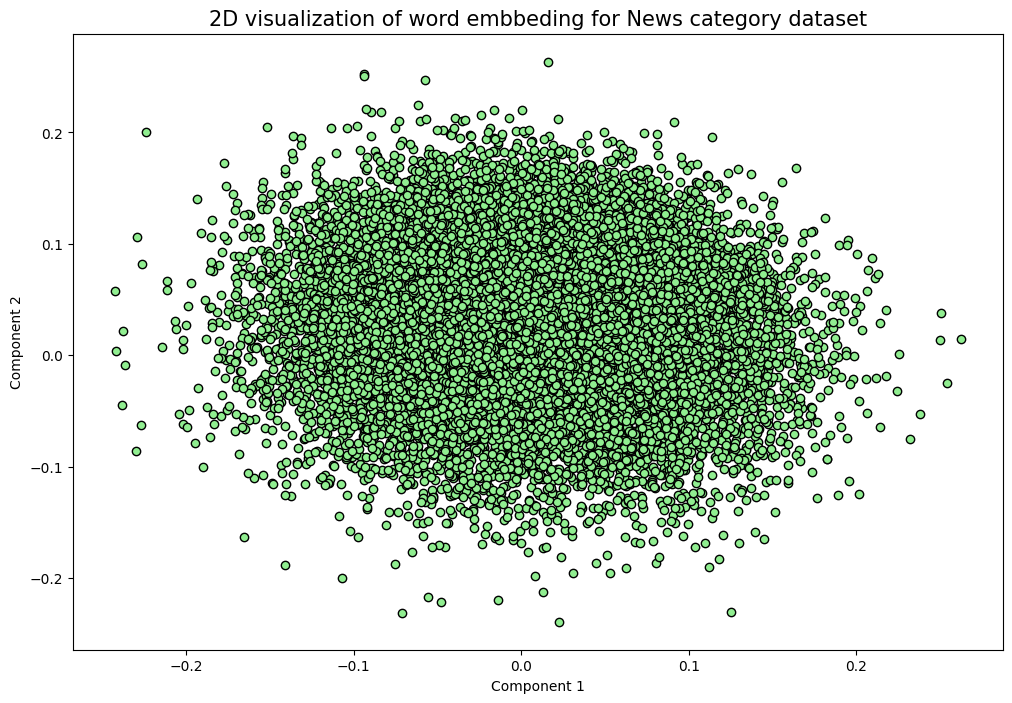

In [36]:
# plotting 2D plot using vector
plt.figure( figsize=[12,8])
plt.scatter(vectors[:,0], vectors[:,1], edgecolors='k', c='lightgreen')


plt.title('2D visualization of word embbeding for News category dataset', fontsize =15)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


In [38]:
# Checking the similarity between words

custom_model.wv.similarity('fraud', 'complaint')

0.5958536

In [41]:
custom_model.wv.similarity('banks', 'money')

0.3225746